In [48]:
!pip install ctgan


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.5/70.5 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.6 MB/s eta 0:00:00


In [51]:
!pip install table_evaluator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 27.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns


In [35]:

def generate_synthetic_data(num_rows, num_columns, value_range):
    # Generate random numeric data within the specified range
    synthetic_data = np.random.uniform(value_range[0], value_range[1], size=(num_rows, num_columns))
    return synthetic_data

def save_to_csv(data, file_name):
    df = pd.DataFrame(data)
    df.to_csv(file_name, index=False)



In [36]:
# Parameters
num_rows = 100  # Number of rows
num_columns = 5  # Number of columns
value_range = (10, 100)  # Range for random values

# Generate synthetic data
synthetic_data = generate_synthetic_data(num_rows, num_columns, value_range)

# Save data to CSV file
file_name = 'synthetic_data.csv'
save_to_csv(synthetic_data, file_name)

print(f'Synthetic data with {num_rows} rows and {num_columns} columns generated and saved to {file_name}.')

Synthetic data with 100 rows and 5 columns generated and saved to synthetic_data.csv.


In [37]:
synthetic_data=pd.read_csv("/content/synthetic_data.csv")
synthetic_data

,0,1,2,3,4
0,55.384514,26.778289,46.540224,40.492013,43.260887
1,63.543103,54.547361,99.401571,54.409273,44.484362
2,38.173030,89.923300,70.854740,92.113861,96.475797
3,81.642031,62.869876,87.646700,25.467848,62.833368
4,30.999931,99.621545,75.744536,38.957117,47.136525
...,...,...,...,...,...
95,57.853115,16.936990,91.725007,31.516713,68.547867
96,45.380710,24.576697,14.953888,16.738073,95.601431
97,65.871613,48.823566,42.786880,78.682550,47.480974
98,23.665675,48.115432,17.515668,72.919504,24.634935


<Axes: ylabel='Count'>

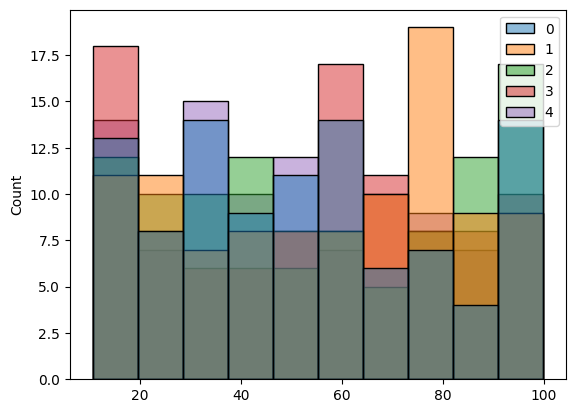

In [38]:
sns.histplot(synthetic_data)

In [39]:
from scipy.stats import zscore

z_scores = zscore(synthetic_data)
outliers = (z_scores > 3) | (z_scores < -3)
synthetic_data_no_outliers = synthetic_data[~outliers.any(axis=1)]
# print(outliers)
# print(synthetic_data_no_outliers)
if synthetic_data_no_outliers.shape==synthetic_data.shape:
  print("NO outliers")

NO outliers


<Axes: ylabel='Count'>

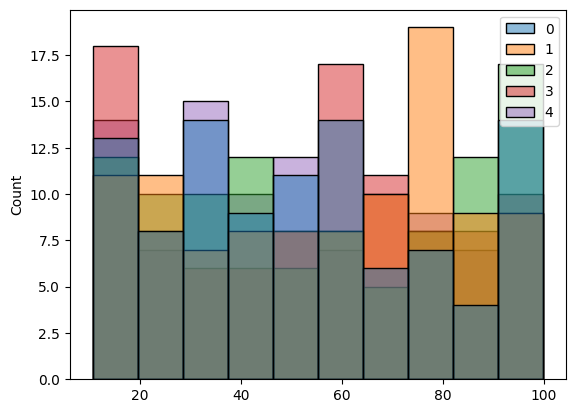

In [40]:
sns.histplot(synthetic_data_no_outliers)

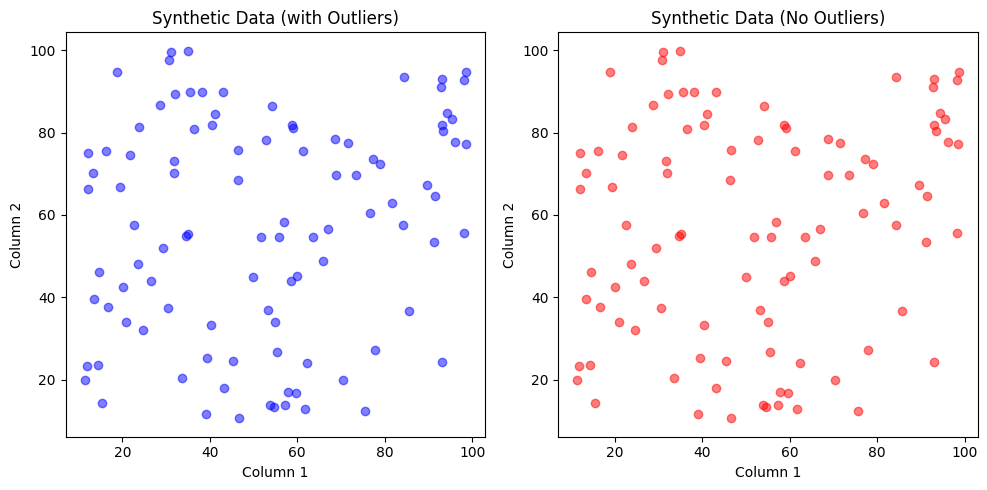

In [41]:
import matplotlib.pyplot as plt

# Scatter plot for two columns (you can adjust column numbers as needed)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(synthetic_data.iloc[:, 0], synthetic_data.iloc[:, 1], c='blue', alpha=0.5)
plt.title('Synthetic Data (with Outliers)')
plt.xlabel('Column 1')
plt.ylabel('Column 2')

plt.subplot(1, 2, 2)
plt.scatter(synthetic_data_no_outliers.iloc[:, 0], synthetic_data_no_outliers.iloc[:, 1], c='red', alpha=0.5)
plt.title('Synthetic Data (No Outliers)')
plt.xlabel('Column 1')
plt.ylabel('Column 2')

plt.tight_layout()
plt.show()


comparing data


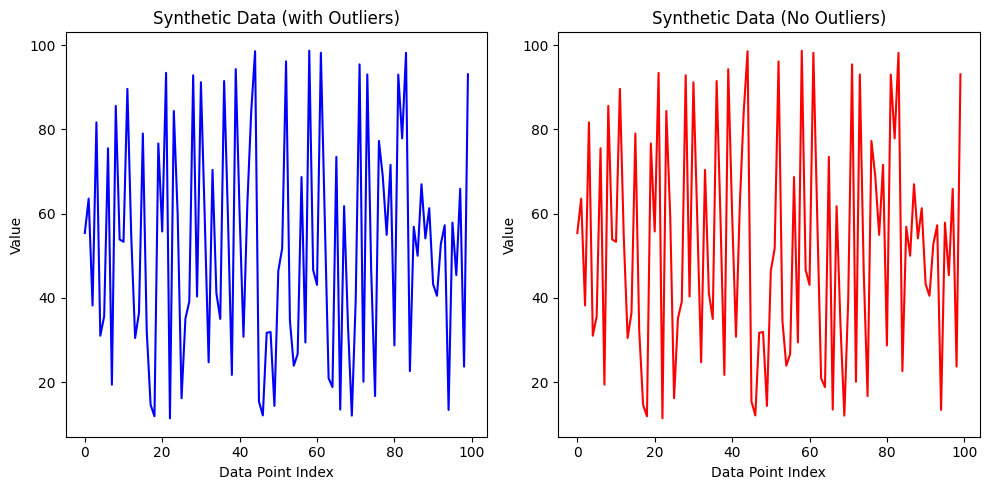

In [42]:
import matplotlib.pyplot as plt

# Assuming you want to compare the first column

plt.figure(figsize=(10, 5))

# Line plot for synthetic_data
plt.subplot(1, 2, 1)
plt.plot(synthetic_data.iloc[:, 0], color='blue')
plt.title('Synthetic Data (with Outliers)')
plt.xlabel('Data Point Index')
plt.ylabel('Value')

# Line plot for synthetic_data_no_outliers
plt.subplot(1, 2, 2)
plt.plot(synthetic_data_no_outliers.iloc[:, 0], color='red')
plt.title('Synthetic Data (No Outliers)')
plt.xlabel('Data Point Index')
plt.ylabel('Value')

plt.tight_layout()
plt.show()


In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(synthetic_data_no_outliers)
scaled_data


array([[5.04184567e-01, 1.81341837e-01, 3.94336942e-01, 3.42940787e-01,
        3.64084348e-01],
       [5.97668643e-01, 4.92208698e-01, 9.98631049e-01, 5.02489907e-01,
        3.78012147e-01],
       [3.06969128e-01, 8.88232274e-01, 6.72292754e-01, 9.34739774e-01,
        9.69872759e-01],
       [8.05052740e-01, 5.85376892e-01, 8.64253101e-01, 1.70701984e-01,
        5.86893741e-01],
       [2.24777149e-01, 9.96801368e-01, 7.28191346e-01, 3.25344558e-01,
        4.08203869e-01],
       [2.77137152e-01, 8.86940016e-01, 6.98341385e-01, 5.20980330e-01,
        9.11604259e-01],
       [7.34624965e-01, 1.88302131e-02, 4.93318871e-01, 1.50592584e-01,
        5.01129659e-01],
       [9.16284320e-02, 6.28869184e-01, 2.66778433e-01, 8.48455727e-01,
        2.84632967e-02],
       [8.49875601e-01, 2.91537273e-01, 9.58463858e-01, 8.62148122e-01,
        1.38745468e-03],
       [4.86653724e-01, 3.54600265e-02, 8.51632904e-01, 6.54336847e-01,
        2.33802678e-01],
       [4.80209545e-01, 2.9491

To apply Root **Mean Square Error (RMSE)**, **Mean Absolute Error (MAE)**, and **Mean Squared Error (MSE)**, you would typically need to have both the actual target values and the predicted values. Since you've generated synthetic data and don't have actual targets, we'll calculate these metrics relative to the original data.

We'll consider the **original data** as our **"actual"** values and the **scaled data** as our **"predicted"** values for demonstration purposes

In [55]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(synthetic_data_no_outliers, scaled_data)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(synthetic_data_no_outliers, scaled_data)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 53.749248506022596
Mean Squared Error (MSE): 3592.0740146918106
Root Mean Squared Error (RMSE): 59.93391372746995


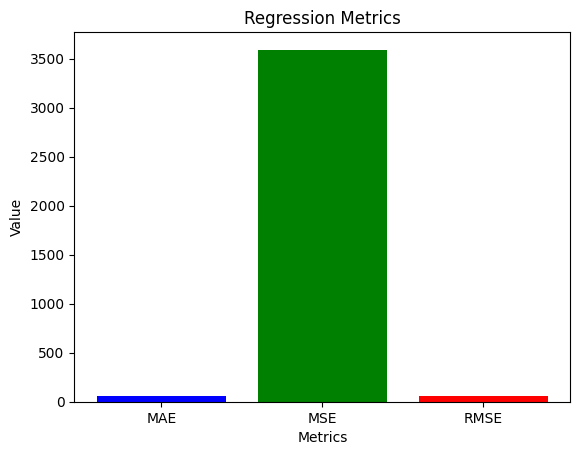

In [56]:
import matplotlib.pyplot as plt

# Define the metrics and their values
metrics = ['MAE', 'MSE', 'RMSE']
values = [mae, mse, rmse]

# Create a bar chart
plt.bar(metrics, values, color=['blue', 'green', 'red'])

# Add titles and labels
plt.title('Regression Metrics')
plt.xlabel('Metrics')
plt.ylabel('Value')

# Display the chart
plt.show()


In [52]:
synthetic_data.columns


Index(['0', '1', '2', '3', '4'], dtype='object')

In [53]:
features=['0', '1', '2', '3', '4']


Model


In [54]:
from ctgan import CTGAN

In [57]:
ctgan=CTGAN(verbose=True)
ctgan.fit(synthetic_data_no_outliers,features,epochs=50)

Gen. (4.58) | Discrim. (-0.02): 100%|██████████| 50/50 [00:29<00:00,  1.69it/s]


Synthetic data generation

In [58]:
samples=ctgan.sample(200)

In [60]:
samples


,0,1,2,3,4
0,98.156905,75.465470,43.779313,93.789485,53.904603
1,52.772021,12.899368,98.338363,33.593419,25.126769
2,89.593911,56.649639,28.499989,72.815288,95.601431
3,91.174189,75.465470,91.725007,16.494171,44.484362
4,35.079027,45.165665,83.883388,59.141095,54.827860
...,...,...,...,...,...
195,57.224163,13.831743,72.445245,55.480595,32.871169
196,30.452702,93.421659,24.412232,27.882118,99.122296
197,20.891978,66.295773,98.338363,91.995207,32.737461
198,91.174189,69.737794,91.959481,93.789485,14.903183
